In [1]:
%pip install kaggle


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Create the API client
api = KaggleApi()
api.authenticate()  # Uses ~/.kaggle/kaggle.json

In [11]:
#Dependencies
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/cancer-prediction-dataset")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 47.3k/47.3k [00:00<00:00, 38.0MB/s]

Extracting files...
Path to dataset files: /Users/shevyapanda/.cache/kagglehub/datasets/rabieelkharoua/cancer-prediction-dataset/versions/2


In [5]:
print(os.listdir("/Users/shevyapanda/.cache/kagglehub/datasets/rabieelkharoua/cancer-prediction-dataset/versions/2"))  # check files

['The_Cancer_data_1500_V2.csv']


In [10]:
file = os.path.join(path, "The_Cancer_data_1500_V2.csv")  

cancer = pd.read_csv(file)
cancer.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


**Exploratory Data Analysis:**

In [12]:
cancer.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


/var/folders/z_/5vjxj12n6l1_lx8vl9hfs5h80000gn/T/ipykernel_16687/1584970649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


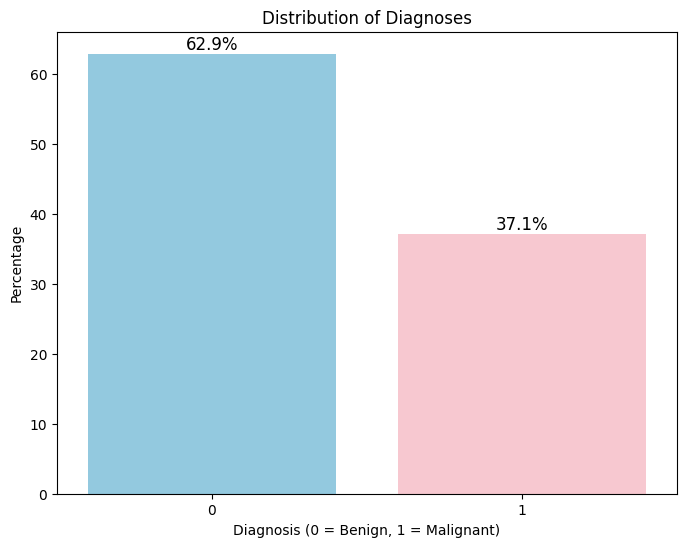

In [39]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    x="Diagnosis", 
    data=cancer, 
    palette=["skyblue","pink"], 
    stat="percent"   
)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha="center", va="bottom", fontsize=12)

ax.set_ylabel("Percentage")
ax.set_title("Distribution of Diagnoses")
ax.set_xlabel("Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()


**EDA**

In [24]:
print(cancer.dtypes)

Age                   int64
Gender                int64
BMI                 float64
Smoking               int64
GeneticRisk           int64
PhysicalActivity    float64
AlcoholIntake       float64
CancerHistory         int64
Diagnosis             int64
dtype: object


In [29]:
#Make a dataframe to just see Malignant cases
mal_df = cancer[cancer['Diagnosis'] == 1]
mal_df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
8,58,1,30.274525,0,1,4.719025,0.943161,1,1
10,38,1,35.996533,0,2,8.467850,2.642921,0,1


Age: Integer values representing the patient's age, ranging from 20 to 80.
Gender: Binary values representing gender, where 0 indicates Male and 1 indicates Female.
BMI: Continuous values representing Body Mass Index, ranging from 15 to 40.
Smoking: Binary values indicating smoking status, where 0 means No and 1 means Yes.
GeneticRisk: Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.
PhysicalActivity: Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.
AlcoholIntake: Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.
CancerHistory: Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.
Diagnosis: Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

In [36]:
mal_df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.0
mean,54.831239,0.653501,29.277175,0.400359,0.732496,4.338388,2.810793,0.323160,1.0
std,16.835543,0.476282,6.650899,0.490412,0.821411,2.969285,1.413624,0.468104,0.0
min,20.000000,0.000000,15.033841,0.000000,0.000000,0.002410,0.003948,0.000000,1.0
25%,42.000000,0.000000,25.107969,0.000000,0.000000,1.640636,1.598260,0.000000,1.0
50%,56.000000,1.000000,29.830539,0.000000,0.000000,4.074079,3.028797,0.000000,1.0
75%,69.000000,1.000000,34.672585,1.000000,1.000000,6.696113,4.015378,1.000000,1.0
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.0


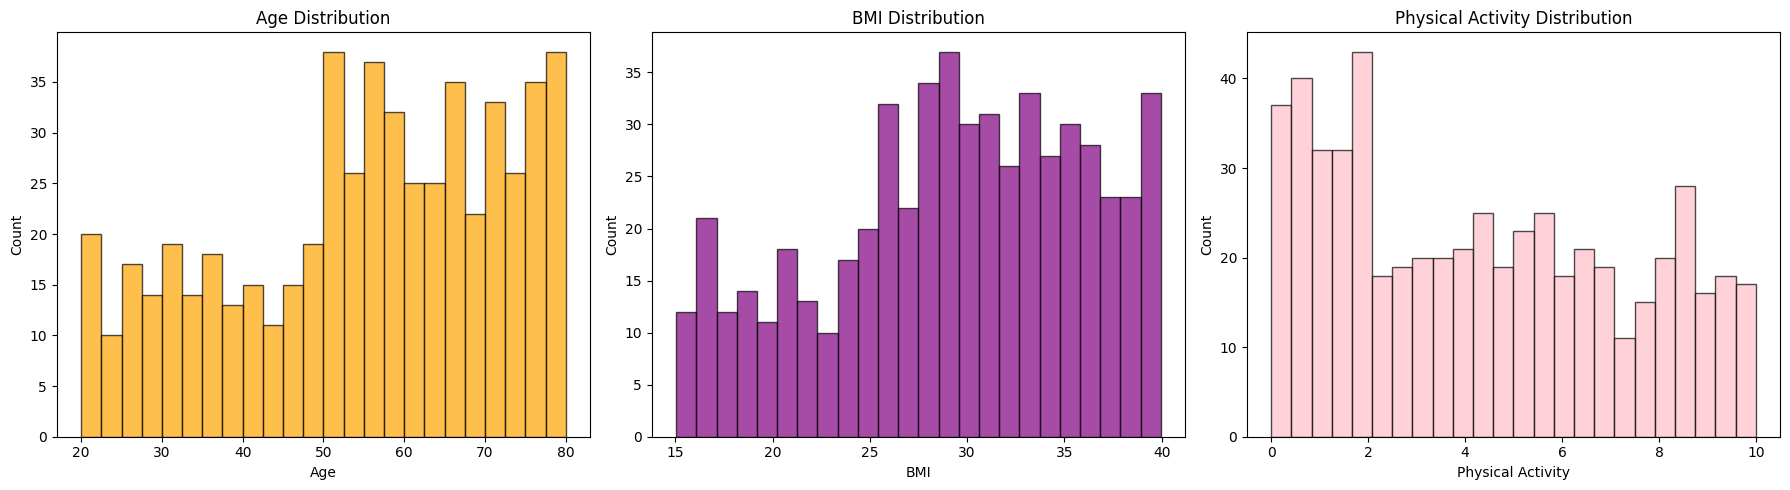

In [47]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Age
axes[0].hist(mal_df["Age"], bins=24, color='orange', edgecolor="black", alpha=0.7)
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

#BMI
axes[1].hist(mal_df["BMI"], bins=24, color='purple', edgecolor="black", alpha=0.7)
axes[1].set_title("BMI Distribution")
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Count")

#Physical Activity
axes[2].hist(mal_df["PhysicalActivity"], bins=24, color='pink', edgecolor="black", alpha=0.7)
axes[2].set_title("Physical Activity Distribution")
axes[2].set_xlabel("Physical Activity")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


From this, I can generalize that older patients with high BMI and lower amounts of exercise seem to have higher rates of cancer. Specifically, there is a sharp increase for patients that are above the age of 50 according to this, but I want to check if that could be due to more patients in the sample being older.

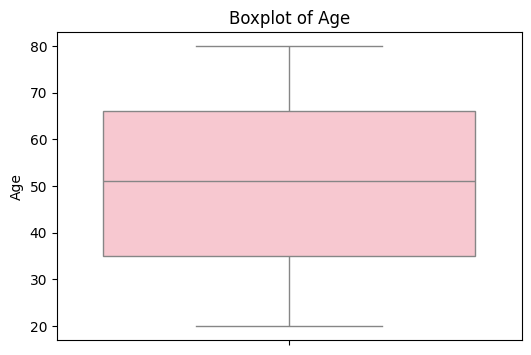

In [49]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=cancer["Age"], color="pink")
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()

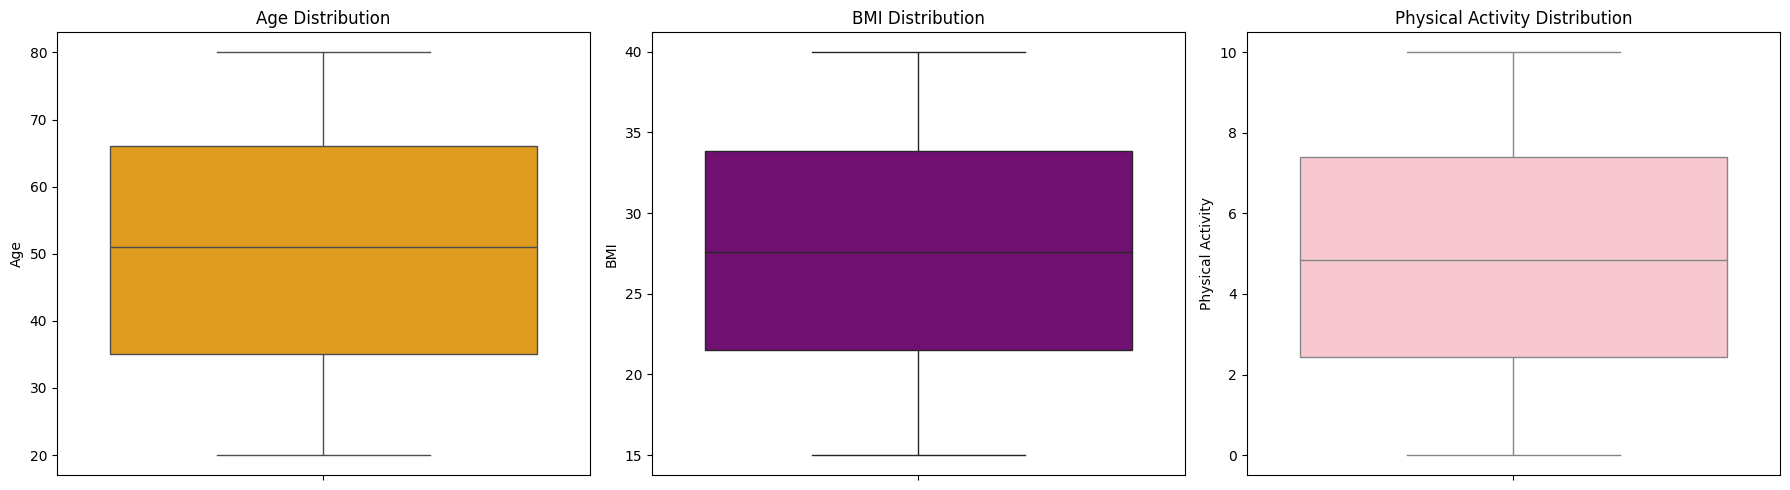

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Age
sns.boxplot(y=cancer["Age"], ax=axes[0], color="orange")
axes[0].set_title("Age Distribution")
axes[0].set_ylabel("Age")

#BMI
sns.boxplot(y=cancer["BMI"], ax=axes[1], color="purple")
axes[1].set_title("BMI Distribution")
axes[1].set_ylabel("BMI")

#Physical Activity
sns.boxplot(y=cancer["PhysicalActivity"], ax=axes[2], color="pink")
axes[2].set_title("Physical Activity Distribution")
axes[2].set_ylabel("Physical Activity")

plt.tight_layout()
plt.show()


Okay all of these seem to be evenly distributed, so I can assume that metrics across demographics and attributes are relatively balanced 

/var/folders/z_/5vjxj12n6l1_lx8vl9hfs5h80000gn/T/ipykernel_16687/3608392225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


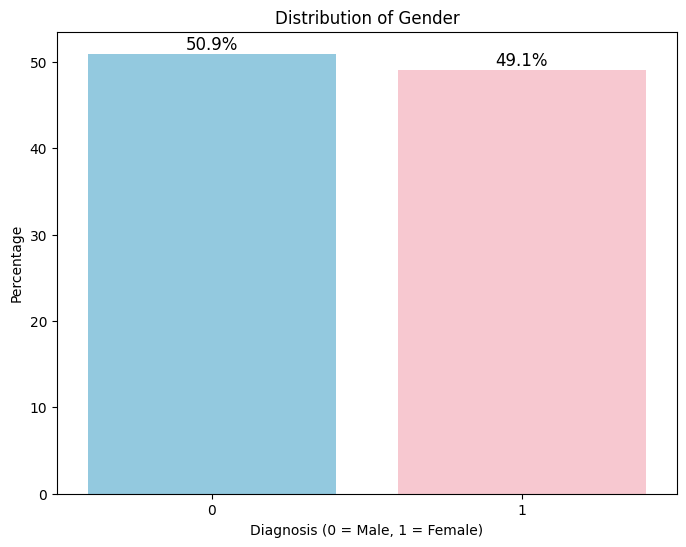

In [59]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    x="Gender", 
    data=cancer, 
    palette=["skyblue","pink"], 
    stat="percent"   
)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha="center", va="bottom", fontsize=12)

ax.set_ylabel("Percentage")
ax.set_title("Distribution of Gender")
ax.set_xlabel("Diagnosis (0 = Male, 1 = Female)")
plt.show()


/var/folders/z_/5vjxj12n6l1_lx8vl9hfs5h80000gn/T/ipykernel_16687/106940518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


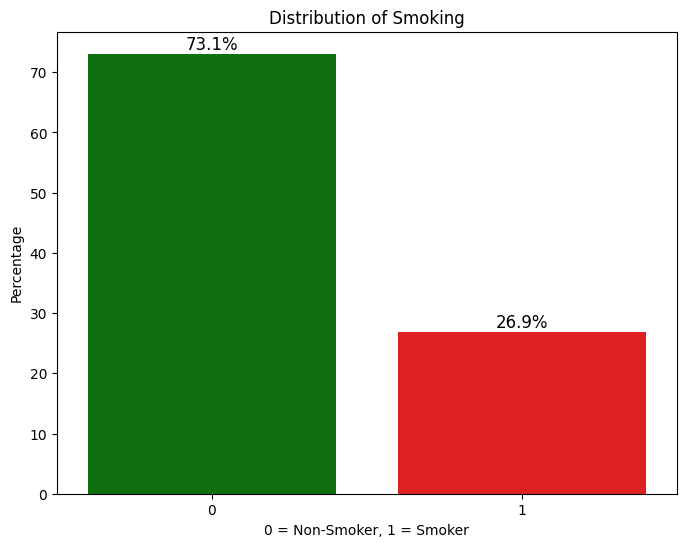

In [65]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    x="Smoking", 
    data=cancer, 
    palette=["green","red"], 
    stat="percent"   
)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha="center", va="bottom", fontsize=12)

ax.set_ylabel("Percentage")
ax.set_title("Distribution of Smoking")
ax.set_xlabel("0 = Non-Smoker, 1 = Smoker")
plt.show()


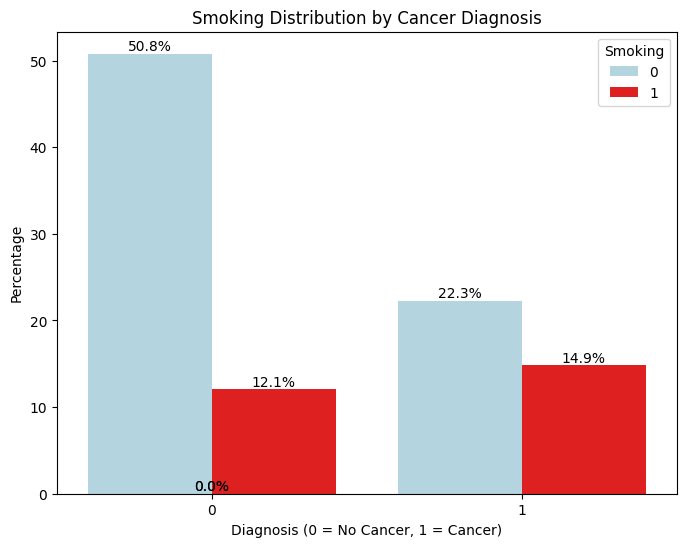

In [64]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    x="Diagnosis", 
    hue="Smoking",        # groups by Smoking within each diagnosis
    data=cancer, 
    palette=["lightblue","red"], 
    stat="percent"
)

# Add % labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1f}%", 
                (p.get_x() + p.get_width()/2., height), 
                ha="center", va="bottom", fontsize=10)

ax.set_ylabel("Percentage")
ax.set_title("Smoking Distribution by Cancer Diagnosis")
ax.set_xlabel("Diagnosis (0 = No Cancer, 1 = Cancer)")
plt.show()


/var/folders/z_/5vjxj12n6l1_lx8vl9hfs5h80000gn/T/ipykernel_16687/1161061228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='BMI', data=cancer, palette='coolwarm')


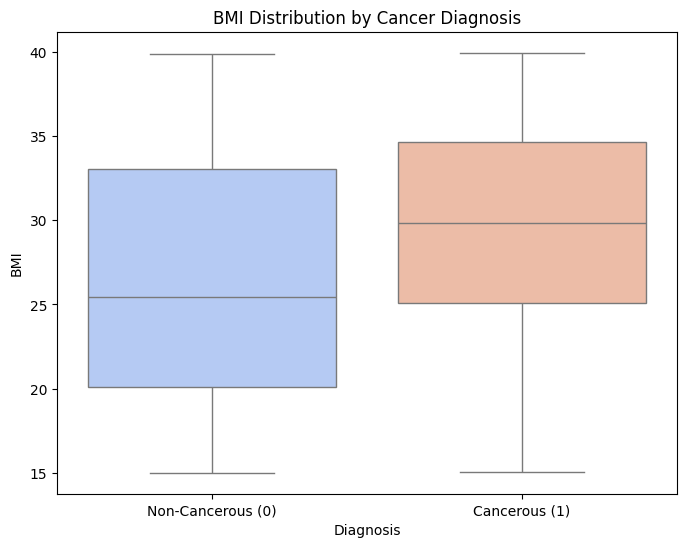

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='BMI', data=cancer, palette='coolwarm')
plt.title('BMI Distribution by Cancer Diagnosis')
plt.xticks([0, 1], ['Non-Cancerous (0)', 'Cancerous (1)'])
plt.xlabel('Diagnosis')
plt.ylabel('BMI')
plt.show()

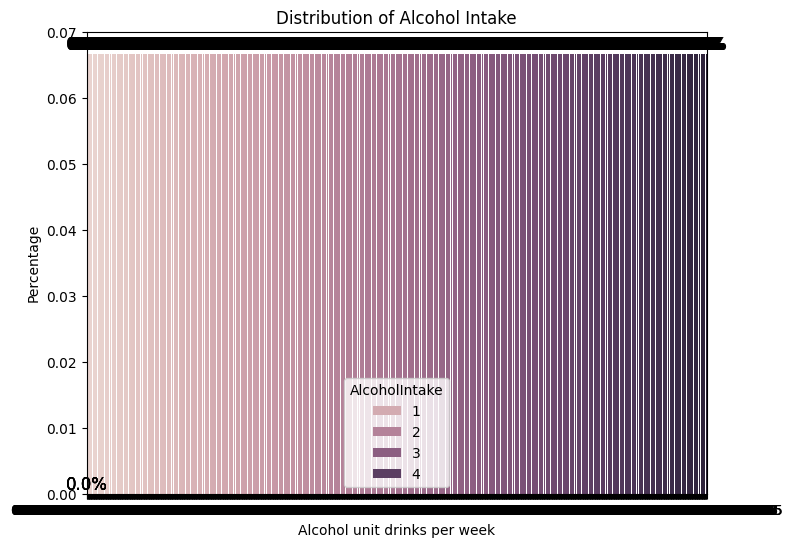

In [77]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    x="AlcoholIntake", 
    data=cancer,
    hue="AlcoholIntake",  
    stat="percent"   
)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha="center", va="bottom", fontsize=12)

ax.set_ylabel("Percentage")
ax.set_title("Distribution of Alcohol Intake")
ax.set_xlabel("Alcohol unit drinks per week")
plt.show()

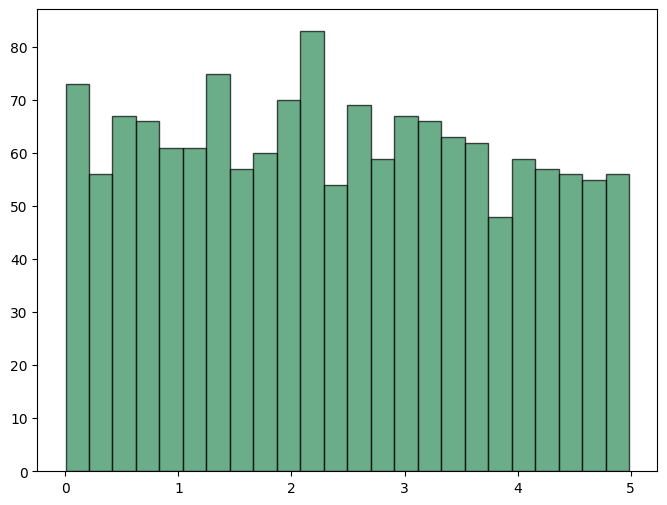

In [75]:
plt.figure(figsize=(8,6))
ax = plt.hist(
    x="AlcoholIntake", 
    data=cancer,bins=24, color='seagreen', edgecolor="black", alpha=0.7    
)


In [55]:
features = [col for col in cancer.columns if col != 'Diagnosis']
print(features)

['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'AlcoholIntake', 'CancerHistory']


/var/folders/z_/5vjxj12n6l1_lx8vl9hfs5h80000gn/T/ipykernel_16687/437202424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="viridis")


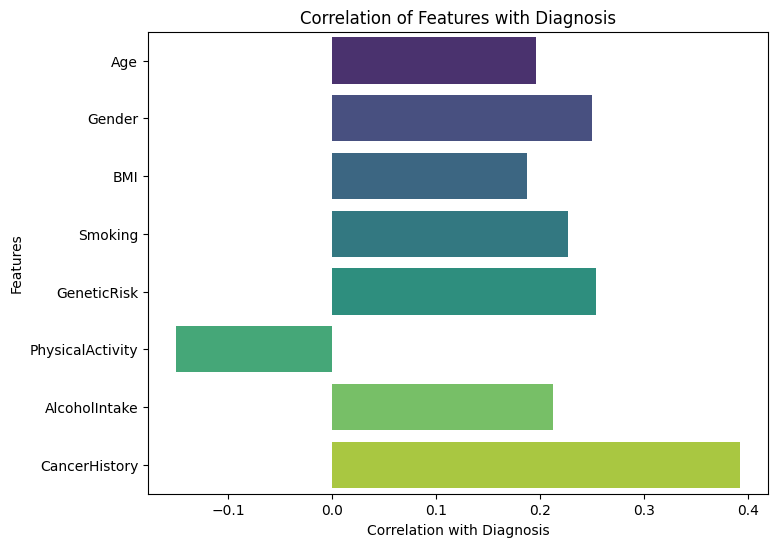

In [58]:
corr = cancer.corr()["Diagnosis"].drop("Diagnosis")

plt.figure(figsize=(8, 6))
sns.barplot(x=corr.values, y=corr.index, palette="viridis")
plt.title("Correlation of Features with Diagnosis")
plt.xlabel("Correlation with Diagnosis")
plt.ylabel("Features")
plt.show()

Classification predicts the class or category of a case, ie whether a cell is benign or malignant -- could be the ideal ML technique I use for this project

Supervised learning models train on labeled data 

You can train the ML model w classification or regression --classification would be better fit as it predicts classembership of new obervations